# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Coursework<a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module ACSE-3: Numerical Methods for year 2019/20.


- This is independent work, you cannot work in groups.


- Each question below is equally weighted in terms of marks.


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use NumPy and SciPy. If you use an algorithm (e.g. from SciPy) not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.


- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - please submit a version where you have run all of the cells and all the outputs/plots etc are visible without me having to run the notebook myself.


<br><br>

# DEADLINE:   5pm Sunday 5 Jan 2020 <a class="tocSkip">

<br><br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coursework-Q1---Implement-RK2-family" data-toc-modified-id="Coursework-Q1---Implement-RK2-family-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coursework Q1 - Implement RK2 family</a></span></li><li><span><a href="#Coursework-Q2---Implementing-backward-Euler-using-a-nonlinear-system-solver" data-toc-modified-id="Coursework-Q2---Implementing-backward-Euler-using-a-nonlinear-system-solver-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Coursework Q2 - Implementing backward Euler using a nonlinear system solver</a></span></li><li><span><a href="#Coursework-Q3---Steady-state-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-Q3---Steady-state-advection-diffusion-with-the-FEM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Coursework Q3 - Steady-state advection-diffusion with the FEM</a></span></li><li><span><a href="#Coursework-Q4---Time-dependent-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-Q4---Time-dependent-advection-diffusion-with-the-FEM-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Coursework Q4 - Time-dependent advection-diffusion with the FEM</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as we're in 2D we will be doing some 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# and using some colormaps
from matplotlib import cm
# and we will create some animations!
import matplotlib.animation as animation
from IPython.display import HTML
from pprint import pprint

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Coursework Q1 - Implement RK2 family

Write a function that implements the RK2 family of methods which takes in the free parameter $\alpha$ that appears in the most general definition of RK2.

For example the first line of your function might read

```Python
def RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5):
```

where `f` is a function of time and the solution $y$.

<br>

Perform some **verification tests of your function to confirm that with the choice $\alpha=1$ your implementation agrees with results from the improved Euler method which was implemented in lecture 5.**

<br>

**Test for convergence using several different values of $\alpha$ using the test problem with RHS and exact solutions given by the test case we saw in lecture 6**:

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

which has the exact solution

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6. $$

You may make use of the following functions implementing these:

```python
def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6
```

<br>

**Consider a simple error metric given by the error in the solution at time $t=3$.**

<br>

**Plot your convergence results, compared with results from the forward Euler and the improved Euler methods, and add to the graph your estimates for the order of convergence of each method.**

<br>

**Also, for a fixed time step size, compute and plot how the error varies as a function of $\alpha$ for values in the range $[0.1,4.0]$.**  

<br>

**What is the optimal value of $\alpha$ which minimises the error for this problem?**

In [2]:
def improved_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        ue = u + dt*f(t, u)  # euler guess
        u = u + 0.5*dt* ( f(t, u) + f(t + dt, ue) )
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

def forward_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + dt*f(t, u)  # euler guess
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

In [3]:
def RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        k1 = f(t,y)
        k2 = f(t+alpha*dt, y+alpha*dt*k1)
        y = y + (1 - 1/(2*alpha)) * dt * k1 + 1/(2*alpha) * dt * k2
        y_all.append(y)
        t = t + dt
        t_all.append(t)
        
    return np.array(y_all), np.array(t_all)
    
def f(t, y):
    return y + t**3


def y(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6


## Question
- verification tests of your function to confirm that with the choice $\alpha=1$ your implementation agrees with results from the improved Euler method which was implemented in lecture 5

original function test =  True
test 1 = True
test 2 = True
test 3 = True


Text(0.5, 1.0, 'test function 3')

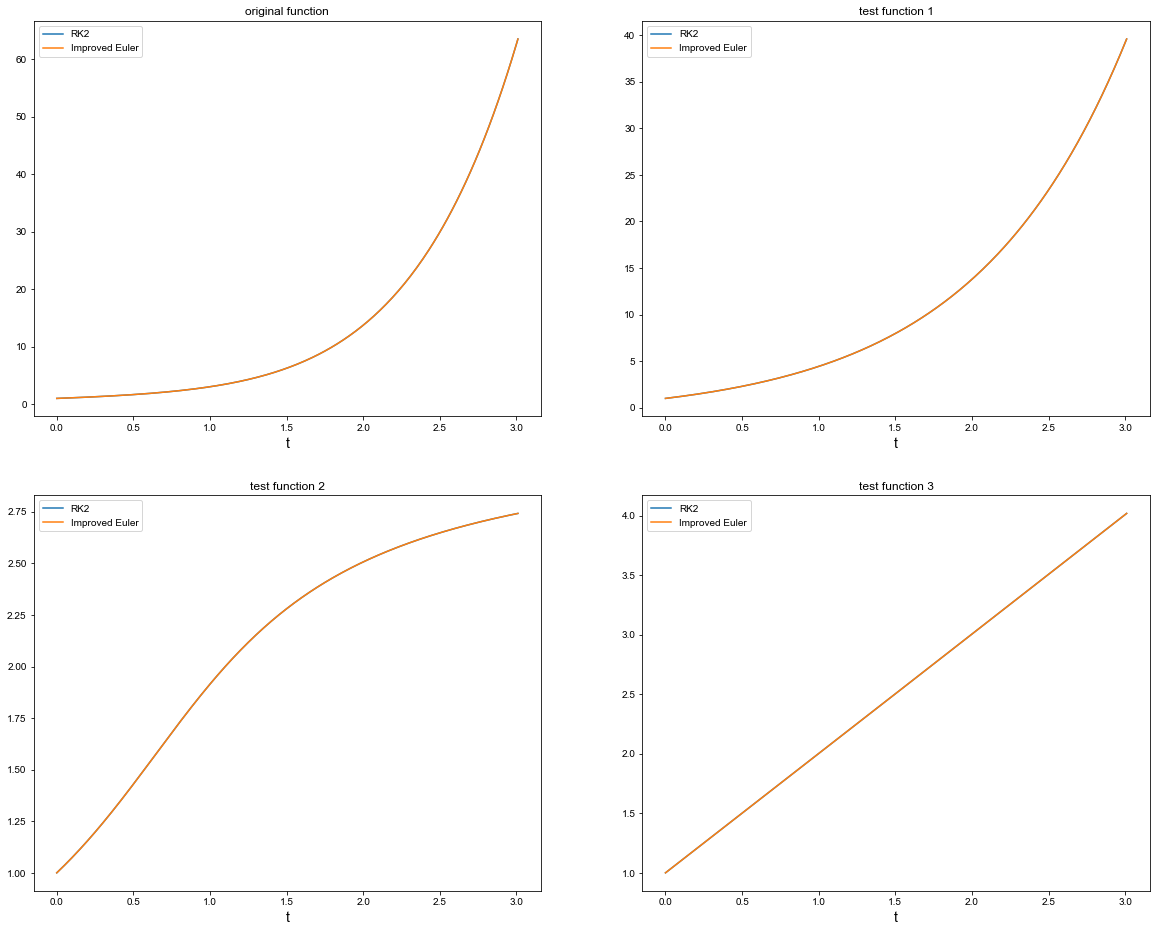

In [4]:
def f_test1(t, y):
    return y+1

def f_test2(t, y):
    return np.sin(y)**2

def f_test3(t, y):
    return np.exp(1e-3*y)

y0 = 1
t0 = 0
t_max = 3
dt = 0.01

RK2_y, t_all = RK2_alpha(f, y0, t0, t_max, dt, alpha=1)
IE_y, t_all = improved_euler(f, y0, t0, t_max, dt)

fig, ax = plt.subplots(2,2, figsize=(20,16))
ax[0,0].plot(t_all, RK2_y, label='RK2')
ax[0,0].plot(t_all, IE_y, label='Improved Euler')
ax[0,0].legend()
ax[0,0].set_title('original function')
ax[0,0].set_xlabel('t', fontsize=14)
print('original function test = ',np.allclose(RK2_y, IE_y))

f_list = [f_test1, f_test2, f_test3]

for i in range(len(f_list)):
    RK2_y, t_all = RK2_alpha(f_list[i], y0, t0, t_max, dt, alpha=1)
    IE_y, t_all = improved_euler(f_list[i], y0, t0, t_max, dt)
    
    row = (i+1) // 2
    col = (i+1) % 2 
    ax[row,col].plot(t_all, RK2_y, label='RK2')
    ax[row,col].plot(t_all, IE_y, label='Improved Euler')
    ax[row,col].legend()
    ax[row,col].set_xlabel('t', fontsize=14)
    print('test ' + str(i+1) + ' =',np.allclose(RK2_y, IE_y))
ax[0,1].set_title('test function 1')
ax[1,0].set_title('test function 2')
ax[1,1].set_title('test function 3')

## Analysis
From 4 pictures and 4 np.allclose comparison, it verifies the my function with the choice $\alpha=1$ agrees with results from the improved Euler method

## Question
- Test for convergence using several different values of $\alpha$ using the test problem with RHS and exact solutions given by the test case we saw in lecture 6
- Consider a simple error metric given by the error in the solution at time $t=3$
- Plot your convergence results, compared with results from the forward Euler and the improved Euler methods, and add to the graph your estimates for the order of convergence of each method

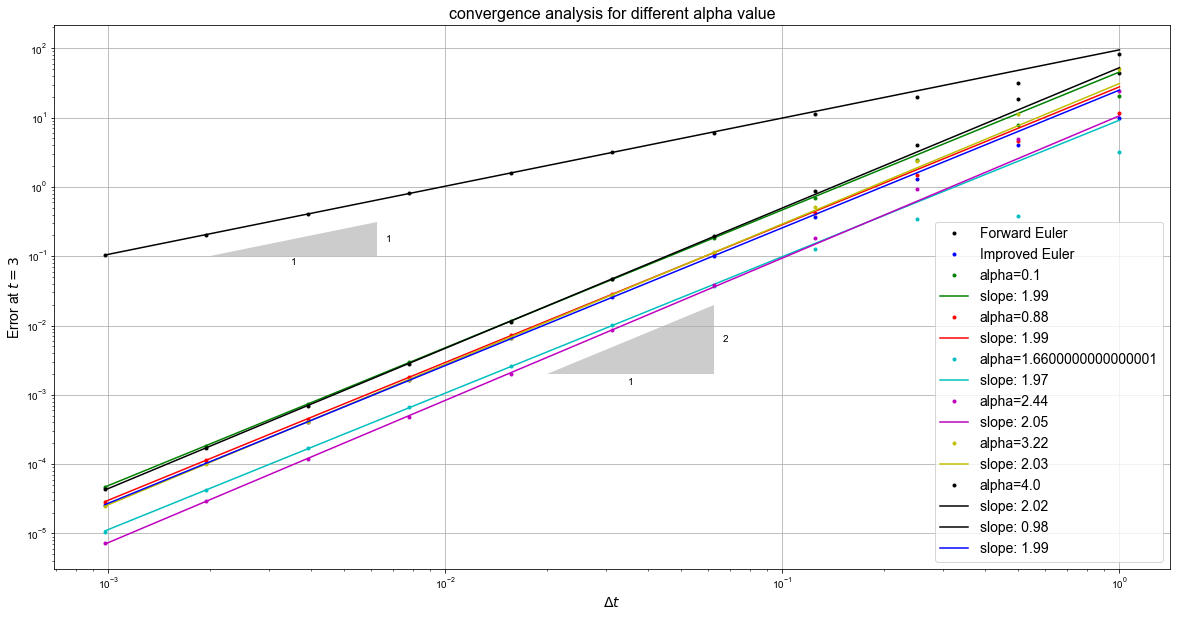

In [5]:
import numpy as np

def approx_error(dt, t_max):
    y_all, t_all = forward_euler(f, y0, t0, t_max, dt)
    err1 = abs(y_all[-1] - y(t_max))
    y_all, t_all = improved_euler(f, y0, t0, t_max, dt)
    err2 = abs(y_all[-1] - y(t_max))

    return err1, err2


def RK2_error(dt, t_max, alpha):
    y_all = []
    for i in range(len(alpha)):
        y, _ = RK2_alpha(f, y0, t0, t_max, dt, alpha=alpha[i])
        y_all.append(y[-1])

    return y_all


# problem parameters
y0 = 1.0
t0 = 0.0

error_fe = []
error_ie = []
error_rk2 = []
dt_array = []
dt = 1.
alpha = np.linspace(0.1, 4, 6)
while dt > 5.e-4:
    dt_array.append(dt)
    err1, err2 = approx_error(dt, 3)
    error_fe.append(err1)
    error_ie.append(err2)

    error_RK2 = RK2_error(dt, 3, alpha)
    error_rk2.append(error_RK2)

    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(20, 10))
ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.grid(True)

error_rk2 = np.abs(np.array(error_rk2) - y(t_max))
start_fit = 4

color = ['g', 'r', 'c', 'm', 'y', 'k']
for i in range(len(alpha)):
    ax1.loglog(dt_array, error_rk2[:, i], color[i]+'.',label='alpha='+str(alpha[i]))
    line_fit_rk2 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_rk2[start_fit:, i]), 1)
    ax1.loglog(dt_array, np.exp(line_fit_rk2[1]) * dt_array ** (line_fit_rk2[0]),color[i]+'-',
               label='slope: {:.2f}'.format(line_fit_rk2[0]))

# use numpy.polyfit to find best fit linear line to data

# what does this parameter do, and what happens if you choose equal to a smaller value


line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)

ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array ** (line_fit_fe[0]), 'k-',
           label='slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array ** (line_fit_ie[0]), 'b-',
           label='slope: {:.2f}'.format(line_fit_ie[0]))

annotation.slope_marker((2e-3, 1e-1), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-2, 2e-3), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

ax1.set_title('convergence analysis for different alpha value', fontsize=16)
ax1.legend(loc='best',fontsize=14);

## Analysis
I plot 6 different lines with different alpha value which satisfy code: **"alpha = np.linspace(0.1, 4, 6)"**.
I can find that all the alpha value have slope of error approximates to 2.00.

So the order of convergence is 2.

## Question
- Also, for a fixed time step size, compute and plot how the error varies as a function of $\alpha$ for values in the range $[0.1,4.0]$
- What is the optimal value of $\alpha$ which minimises the error for this problem?

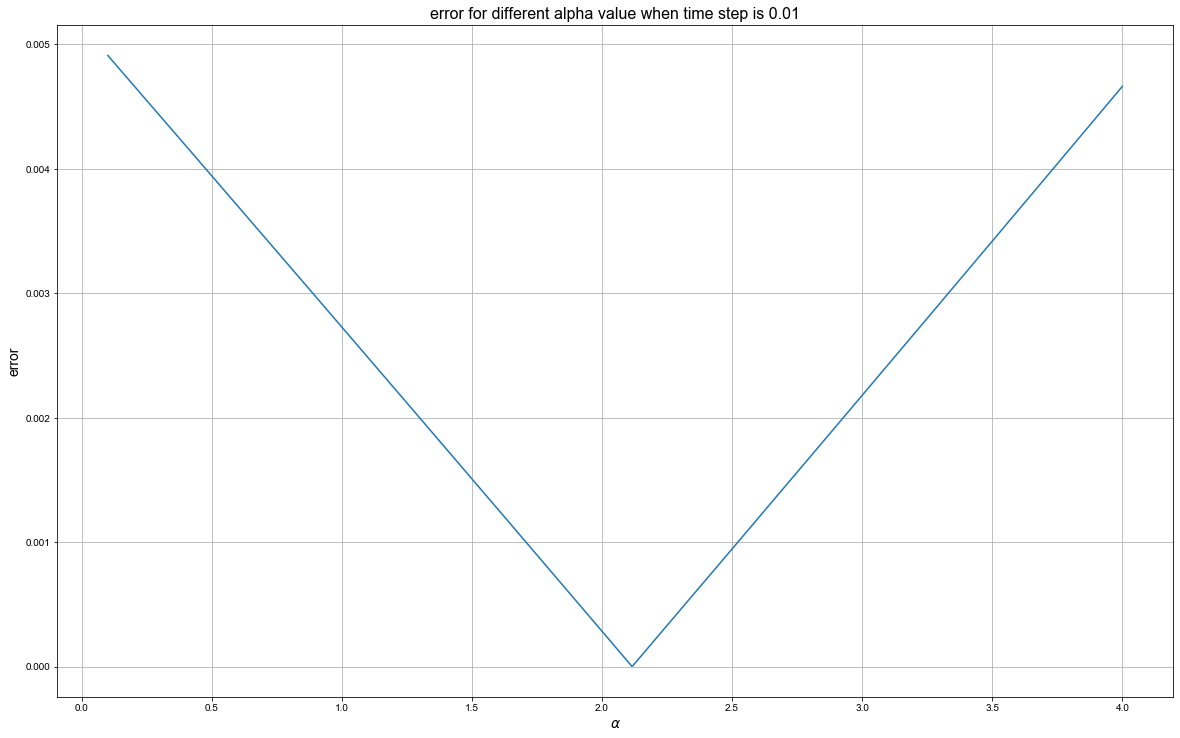

In [6]:
y0 = 1
t0 = 0
t_max = 3
dt = 0.01
alpha = np.linspace(0.1,4,1000)
RK2 = np.zeros(len(alpha), dtype=float)


for i in range(len(alpha)):
    RK2_y, t_all = RK2_alpha(f, y0, t0, t_max, dt, alpha=alpha[i])
    RK2[i] = RK2_y[-1]
    
exact_y = y(t_all)
error_3 = np.abs(RK2 - exact_y[-1])
plt.figure(figsize=(20,20*0.618))
plt.plot(alpha, error_3)
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel('error', fontsize=14)
plt.title('error for different alpha value when time step is 0.01', fontsize = 16)
plt.grid();

## Analysis
from picture above, I can conclude the optimal value of alpha is a little lager than 2.0

So I can derive the optimal value of alpha approximately equal to 2.11

In [7]:
min_index = np.argmin(error_3)
min_alpha = alpha[min_index]
print('alpha value for minimal error = ' + str(min_alpha))

alpha value for minimal error = 2.1144144144144144


# Coursework Q2 - Implementing backward Euler using a nonlinear system solver

In the lecture 5 homework (question "circular orbits") we considered the vector ODE problem

\begin{align*}
\dot{x} & = -y, \\[5pt] 
\dot{y} & = x
\end{align*} 

with initial conditions $x(0)=1,\; y(0)=0$.  

We saw in that homework question how the forward and improved Euler methods performed on this problem.

Recall that the exact solution's trajectory in $(x,y)$ space should map out a circle, but forward Euler's orbit was found to rapidly increase in diameter.

<br> 

**Write a function to implement the backward Euler scheme for a generic RHS vector function $\boldsymbol{f}$.** 

To do this you will need to call a nonlinear system solver, make use of one of the ones that we saw in lecture 4.

<br>

Run your code for the above problem and **comment** on the qualitative differences between your solution obtained with backward Euler with that obtained using forward Euler.

<br>

**Based on your observations implement another implicit two-level scheme which should provide qualitatively improved results compared with both forward and backward Euler.** 

<br>

**Given that the exact solution maps out a circle, consider what mathematical conservation law (a function of the solution variables that should be constant) the solution should respect and check how well each of your methods performs at satisfying this law.**

## Question
- Write a function to implement the backward Euler scheme for a generic RHS vector function $\boldsymbol{f}$.

- To do this you will need to call a nonlinear system solver, make use of one of the ones that we saw in lecture 4.

# Analysis

Firstly, we get **Backward Euler**:

$$ x_{(n+1)} - {\Delta t}\,{f}(t_{(n+1)},{x}_{(n+1)}) = x_{(n)}$$

we can write in form:

$$ G(x_{(n+1)}) = x_{(n+1)} - {\Delta t}\,{f}(t_{(n+1)},{x}_{(n+1)}) - x_{(n)} = 0 $$

from multi-dimensional version of Taylor series analysis from lecture 4, we can get:

$$ \boldsymbol{f}\,(\boldsymbol{x} + \Delta\boldsymbol{x}) = \boldsymbol{f}\,(\boldsymbol{x}) + J(\boldsymbol{x})\Delta\boldsymbol{x},$$

where:

$$ J_{ij} := \frac{\partial f_i}{\partial x_j}. $$

So, we get:

$$ \boldsymbol{f}\,(\boldsymbol{x}^{(k+1)}) = \boldsymbol{f}\,(\boldsymbol{x}^{(k)}) + J_{f}(\boldsymbol{x}^{(k)})(\boldsymbol{x}^{(k+1)} - \boldsymbol{x}^{(k)}).$$

which can be applied to our own function. But we know, Newton method is just like guess the final exact point to fulfill the above function, so we have $x_{(k)} = x_{(n)}$ and $x_{(k+2)} = x_{(n+1)}$, and $x_{(k+1)}$ being the guess point. So, we can get:

$$ G(x_{(k+2)}) = G(x_{(k+1)}) + J_{G}({x}_{(k+1)})({x}_{(k+2)} - {x}_{(k+1)}) \approx 0$$



Then, we get the function for ${x}_{(n+1)}$:

$${x}_{(n+1)} = {x}_{(k+1)} - J_{G}^{(-1)}({x}_{(k+1)})G(x_{(k+1)})$$

with: $$J_{G}({x}_{(k+1)}) = I - {\Delta t}Jf(x_{(k+1)})$$

so, we finally get:

$${x}_{(n+1)} = {x}_{(k+2)} = {x}_{(k+1)} - [I - {\Delta t}Jf(x_{k+1})]^{(-1)}  [x_{(k+1)} - {\Delta t}\,{f}(t_{(k+1)},{x}_{(k+1)}) - x_{(k)}] $$

the same as:

$${x}_{(n+1)} = {x}_{(k+2)} = {x}_{(k+1)} - [I - {\Delta t}Jf(x_{k+1})]^{(-1)}  [x_{(k+1)} - {\Delta t}\,{f}(t_{(k+1)},{x}_{(k+1)}) - x_{(n)}] $$


In [8]:
y0 = np.array([1.,0.])
dt = 0.01
t0 = 0.0
t_max = 100.

In [9]:
def f(t, u): 
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]
    return f

def jacobian(f, t, x, dx=1e-10):
    """ Compute the Jacobian matrix
    """
    J = np.zeros((len(x), len(x)))
    f0 = f(t, x)
    for j in range(len(x)):
        # always start from x
        x_inc = x.copy()
        # increment only the j-th entry by dx
        x_inc[j] +=  dx
        # evaluate f at this incremented x
        f1 = f(t, x_inc)
        # numerical derivative, place the vector result 
        # in the appropriate column of J        
        J[:,j] = (f1 - f0)/dx
        
    return J

In [10]:
# backward
def backward_with_newton(f, y0, t0, t_max, dt):
    """
    gerneral solution applying backward euler with newton method nonlinear solver
    """
    y0 = np.array(y0, dtype=float)
    t = np.array(t0)
    y = [y0]
    t_all = [t0]
    while t < t_max:
        x0 = y[-1]
        x1 = x0 - np.linalg.inv(np.eye(len(y0)) - dt*jacobian(f, t, x0)) @ (x0 - dt * f(t + dt, x0) - y[-1])
        while (np.linalg.norm(x1-x0)>1.e-10):
            x0 = x1
            x1 = x0 - np.linalg.inv(np.eye(len(y0)) - dt*jacobian(f, t, x0)) @ (x0 - dt * f(t + dt, x0) - y[-1])
        y.append(x1)
        t = t + dt
        t_all.append(t)
        
    return np.array(y), np.array(t_all)

y, t_all = backward_with_newton(f, y0, t0, t_max, dt)

In [11]:
# forward
def forward_euler(f, u0, t0, t_max, dt):
    """ Forward Euler time-stepper.
    f = f(t,y) is the RHS function.
    u0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    """ 
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + dt*f(t, u)  # euler guess
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

u, t_all = forward_euler(f, y0, t0, t_max, dt)

## Question
- Run your code for the above problem and **comment** on the qualitative differences between your solution obtained with backward Euler with that obtained using forward Euler.

# Analysis
from pictures below, we can find that, in backward Euler, the radius is decreasing with time increasing. In contrast, in forward Euler, the radius is increasing with time increasing.

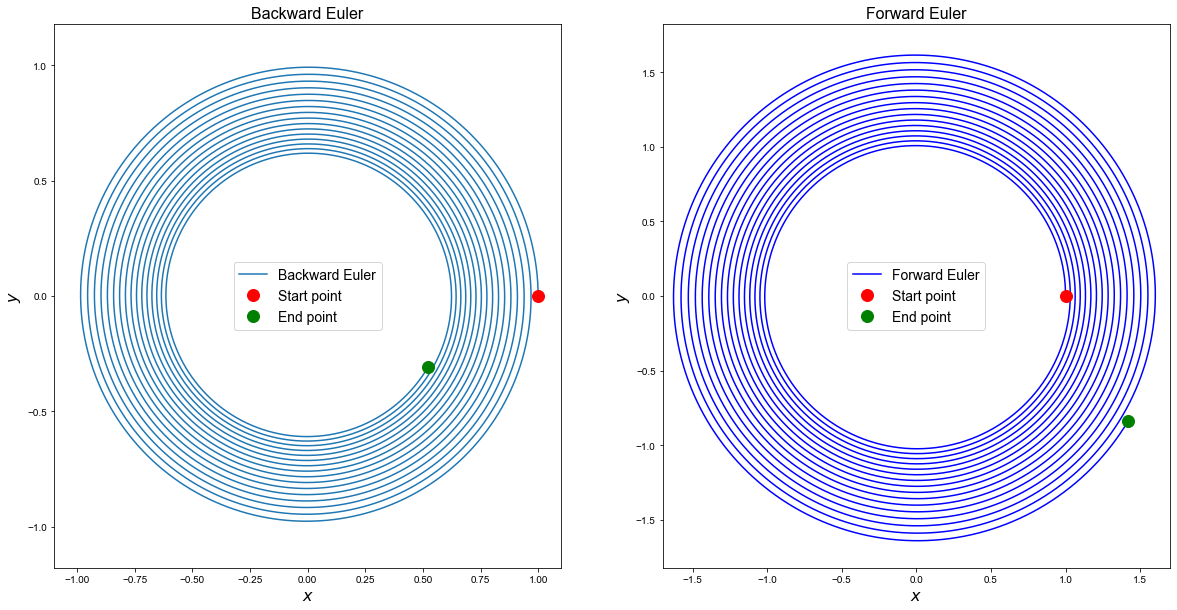

In [12]:
figure,ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(y[:,0],y[:,1], label='Backward Euler')
ax[0].plot(y[0,0], y[0,1], 'ro', label='Start point', markersize=12)
ax[0].plot(y[-1,0], y[-1,1], 'go', label='End point', markersize=12)
ax[0].set_xlabel('$x$', fontsize=16)
ax[0].set_ylabel('$y$', fontsize=16)
ax[0].set_title('Backward Euler', fontsize=16)
ax[0].axis('equal')
ax[0].legend(loc='best', fontsize=14)
ax[0].set_xlim(-1.1,1.1)
ax[0].set_ylim(-1.1,1.1)

ax[1].plot(u[:,0], u[:,1], 'b', label='Forward Euler')
ax[1].plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax[1].plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax[1].set_xlabel('$x$', fontsize=16)
ax[1].set_ylabel('$y$', fontsize=16)
ax[1].set_title('Forward Euler', fontsize=16)
ax[1].axis('equal')
ax[1].legend(loc='best', fontsize=14)
ax[1].set_xlim(-1.7,1.7)
ax[1].set_ylim(-1.7,1.7);

## Question
- Based on your observations implement another implicit two-level scheme which should provide qualitatively improved results compared with both forward and backward Euler

# Analysis
Firstly, we get **trapezoidal**:
\begin{align*}
y_{n+1} - \frac{\Delta t}{2}{f}(t_{n+1},{y}_{n+1}) & =  y_{n} + \frac{\Delta t}{2}{f}(t_{n},{y}_{n})
 \end{align*}

we can write in form:

$$ G(x_{(n+1)}) = x_{(n+1)} - \frac{1}{2}{\Delta t}\,{f}(t_{(n+1)},{x}_{(n+1)}) - \frac{1}{2}{\Delta t}\,{f}(t_{(n)},{x}_{(n)}) - x_{(n)} = 0 $$

from multi-dimensional version of Taylor series analysis from lecture 4, we can get:

$$ \boldsymbol{f}\,(\boldsymbol{x} + \Delta\boldsymbol{x}) = \boldsymbol{f}\,(\boldsymbol{x}) + J(\boldsymbol{x})\Delta\boldsymbol{x},$$

$$ J_{ij} := \frac{\partial f_i}{\partial x_j}. $$

$$ \boldsymbol{f}\,(\boldsymbol{x}_{(k+1)}) = \boldsymbol{f}\,(\boldsymbol{x}_{(k)}) + J_{f}(\boldsymbol{x}_{(k)})(\boldsymbol{x}_{(k+1)} - \boldsymbol{x}_{(k)}).$$

which can be applied to our own function. But we know, Newton method is just like guess the final exact point to fulfill the above function, so we have $x_{(k)} = x_{(n)}$ and $x_{(k+2)} = x_{(n+1)}$, and $x_{(k+1)}$ being the guess point. So, we can get:

$$ G(x_{(k+2)}) = G(x_{(k+1)}) + J_{G}({x}_{(k+1)})({x}_{(k+2)} - {x}_{(k+1)}) \approx 0$$

Then, we get the function for ${x}_{(n+1)}$:

$${x}_{(n+1)} = {x}_{(k+1)} - J_{G}^{(-1)}({x}_{(k+1)})G(x_{(k+1)})$$

with: $$J_{G}({x}_{(k+1)}) = I - \frac{1}{2}{\Delta t}Jf(x_{(k+1)})$$

so, we finally get:
\begin{align*}
{x}_{(n+1)} = {x}_{(k+2)} 
 \end{align*}
 \begin{align*}
= {x}_{(k+1)} - [I - \frac{1}{2}{\Delta t}Jf(x_{k+1})]^{(-1)}  [x_{(k+1)} - \frac{1}{2}{\Delta t}\,{f}(t_{(k+1)},{x}_{(k+1)}) - \frac{1}{2}{\Delta t}\,{f}(t_{(k)},{x}_{(k)}) - x_{(k)}]
 \end{align*}
the same as:
\begin{align*}
{x}_{(n+1)} = {x}_{(k+2)} 
 \end{align*}
 \begin{align*}
= {x}_{(k+1)} - [I - \frac{1}{2}{\Delta t}Jf(x_{k+1})]^{(-1)}  [x_{(k+1)} - \frac{1}{2}{\Delta t}\,{f}(t_{(k+1)},{x}_{(k+1)}) - \frac{1}{2}{\Delta t}\,{f}(t_{(k)},{x}_{(k)}) - x_{(n)}]
 \end{align*}

In [13]:
# trapezoid
def trapezoid(f, y0, t0, t_max, dt):
    """
    gerneral solution applying backward euler with newton method nonlinear solver
    """
    y0 = np.array(y0, dtype=float)
    t = np.array(t0)
    y = [y0]
    t_all = [t0]
    while t < t_max:
        x0 = y[-1]
        x1 = x0 - np.linalg.inv(np.eye(len(y0)) - 0.5 * dt * jacobian(f, t, x0)) @ (x0 - 0.5 * dt * f(t + dt, x0) - 0.5 * dt * f(t, y[-1]) - y[-1])
        while (np.linalg.norm(x1-x0)>1.e-10):
            x0 = x1
            x1 = x0 - np.linalg.inv(np.eye(len(y0)) - 0.5 * dt * jacobian(f, t, x0)) @ (x0 - 0.5 * dt * f(t + dt, x0) - 0.5 * dt * f(t, y[-1]) - y[-1])
        y.append(x1)
        t = t + dt
        t_all.append(t)

    return np.array(y), np.array(t_all)

y_trape, t_all = trapezoid(f, y0, t0, t_max, dt)

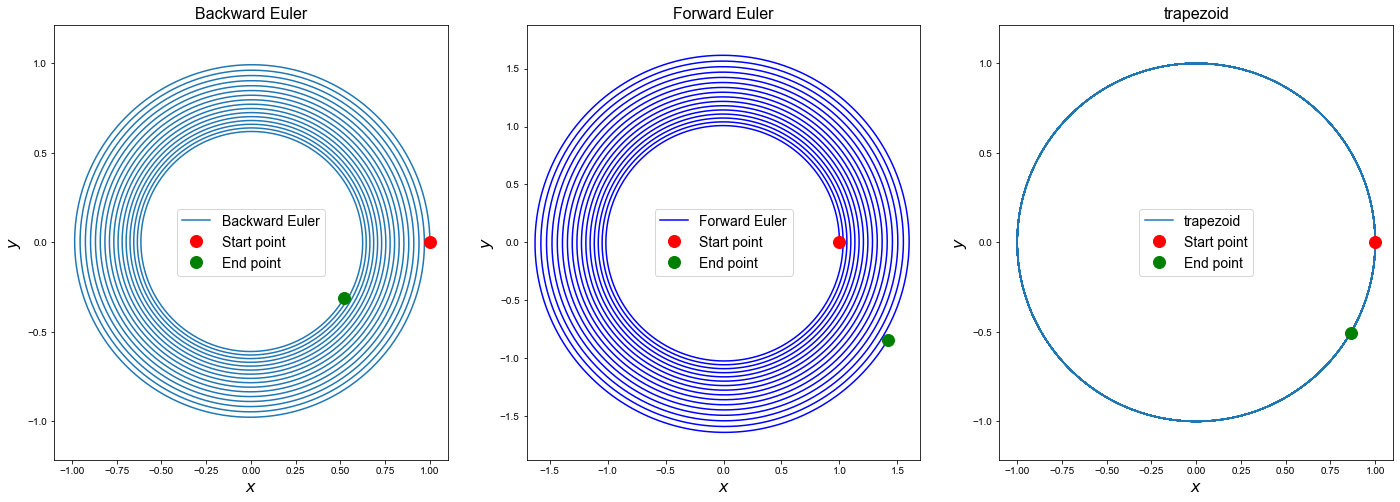

In [14]:
figure,ax = plt.subplots(1, 3, figsize=(24,8))
ax[0].plot(y[:,0],y[:,1], label='Backward Euler')
ax[0].plot(y[0,0], y[0,1], 'ro', label='Start point', markersize=12)
ax[0].plot(y[-1,0], y[-1,1], 'go', label='End point', markersize=12)
ax[0].set_xlabel('$x$', fontsize=16)
ax[0].set_ylabel('$y$', fontsize=16)
ax[0].set_title('Backward Euler', fontsize=16)
ax[0].axis('equal')
ax[0].legend(loc='best', fontsize=14)
ax[0].set_xlim(-1.1,1.1)
ax[0].set_ylim(-1.1,1.1)

ax[1].plot(u[:,0], u[:,1], 'b', label='Forward Euler')
ax[1].plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax[1].plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax[1].set_xlabel('$x$', fontsize=16)
ax[1].set_ylabel('$y$', fontsize=16)
ax[1].set_title('Forward Euler', fontsize=16)
ax[1].axis('equal')
ax[1].legend(loc='best', fontsize=14)
ax[1].set_xlim(-1.7,1.7)
ax[1].set_ylim(-1.7,1.7);

ax[2].plot(y_trape[:,0],y_trape[:,1], label='trapezoid')
ax[2].plot(y_trape[0,0], y_trape[0,1], 'ro', label='Start point', markersize=12)
ax[2].plot(y_trape[-1,0], y_trape[-1,1], 'go', label='End point', markersize=12)
ax[2].set_xlabel('$x$', fontsize=16)
ax[2].set_ylabel('$y$', fontsize=16)
ax[2].set_title('trapezoid', fontsize=16)
ax[2].axis('equal')
ax[2].legend(loc='best', fontsize=14)
ax[2].set_xlim(-1.1,1.1)
ax[2].set_ylim(-1.1,1.1);

## Question
- Given that the exact solution maps out a circle, consider what mathematical conservation law (a function of the solution variables that should be constant) the solution should respect and check how well each of your methods performs at satisfying this law

# Analysis

from picture below we can find that the energy lost of trapzoid method is least which satifies the trajectory picture above which is nearly a perfect circle.

As for Backward Euler and Forward Euler method, we can find the trajectory is changing as time going, which satisfies the energy lost pocture below. their energy lost is much more than that of trapzoid method.

In [15]:
x_all, t_all = improved_euler(f, y0, t0, t_max, dt)

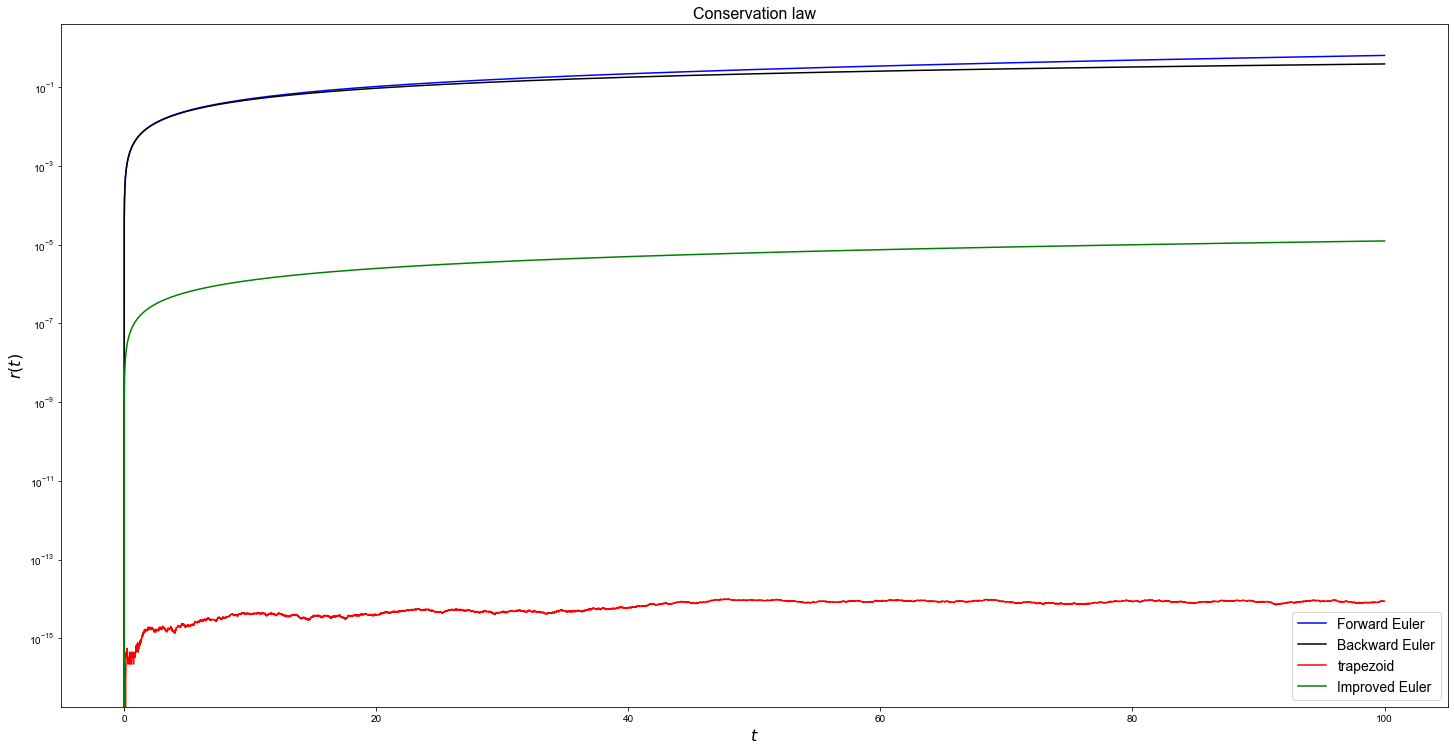

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
ax.semilogy(t_all, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'b', label='Forward Euler')
ax.semilogy(t_all, np.abs(np.sqrt(y[:,0]**2 + y[:,1]**2) - np.sqrt(y[0,0]**2 + y[0,1]**2)), 'k', label='Backward Euler')
ax.semilogy(t_all, np.abs(np.sqrt(y_trape[:,0]**2 + y_trape[:,1]**2) - np.sqrt(y_trape[0,0]**2 + y_trape[0,1]**2)), 'r', label='trapezoid')
ax.semilogy(t_all, np.abs(np.sqrt(x_all[:,0]**2 + x_all[:,1]**2) - np.sqrt(x_all[0,0]**2 + x_all[0,1]**2)), 'g', label='Improved Euler')
fig.tight_layout(w_pad=4)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$r(t)$', fontsize=16)
ax.set_title('Conservation law', fontsize=16)
ax.legend(loc='best', fontsize=14);

# Coursework Q3 - Steady-state advection-diffusion with the FEM


In this part of the question we want to solve steady-state advection-diffusion using the (non-local-assembly based) finite element approach we developed in lecture 11.



Using the finite element method
formulate and solve the steady-state advection-diffusion (boundary value) problem with **Dirichlet boundary conditions** we considered in lecture 7 (the exact solution to which is given below).

The difference to what we've seen before in our FEM codes is that **you now need to discretise the advection term, which ultimately involves integrating basis functions multiplied by their derivatives over elements.**

[**Hint:** *your starting point for this might be the code we wrote in lecture 11 section 5.4 ("Dealing with more complex BCs (Inhomogeneous Dirichlet)"). You need to add in an extra contribution to the LHS corresponding to advection (cf. L11 homework 1.4 where we ended up adding a mass matrix when we solved the problem $u''+u=f$).  You will need to **remember to also add in the appropriate extra advection related RHS terms** corresponding to the boundary contributions (as was explained in the context of diffusion in section 5.4.2 of lecture 11).*]

<br>

Verify your implementation with a convergence with $\Delta x$ analysis using the exact solution given by
```Python
def u_exact(x):
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)
```
You can use the following parameters (using the notation of lecture 7)
```Python
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1
```
where `CE` is the Dirichlet BC value at the right hand boundary, the left hand boundary being a **homogeneous Dirichlet condition.**



<br>

**Do you observe the expected order of convergence?**

<br>

**Finally, compare the errors in your solution against a corresponding finite difference solver**. You may re-use code from lecture 7 for this. What do you observe?

<br>

Throughout this question you may assume for simplicity a uniform mesh.

## Analysis

we know time-independent advection-diffusioin in one-dimension(1D):

$$U\frac{\partial c}{\partial x} = \kappa\frac{\partial^2 c}{\partial x^2}$$

after non-dimensinal:

$$\frac{\partial c^*}{\partial x^*} = \frac{1}{Pe}\frac{\partial^2 c^*}{\partial (x^*)^2}$$

so, we get:

$$Pe \frac{\partial u}{\partial x} - \frac{\partial^2 u}{\partial x^2} = 0$$

meanwhile, from lecture 11, we know the "discretisation" matrix for diffusion term $K$. So we only need to add the "discretisation" matrix for advection term, denoted by S.

we know the LHS is a linear combination of S and K, so we can consider S and K separately which can simplify the calculate process and be easyly understood.

I start from continuous equation:

$$u' = f$$

I look for a function $u\in V$ such that for all $v\in V$

$$\int_I \,u'\,v\,dx = \int_I \,f\,v\,dx$$

So now we have the discretised problem - find $u_h\in V_h$ (or equivalently find the weights $u_j$, $j=0,\ldots n$) such that:

$$\int_I \,u_h'\,\phi_i\,dx = \int_I \,f\,\phi_i\,dx, \;\;\;\;\text{for}\;\;\;\; i=0,\ldots,n.$$

and the RHS vector

$$ b_i = \int_0^1 f\, \phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n.$$

we can perform ***integration by parts*** and instead require that

$$\int_I \,u_h'\,\phi_i\,dx = \int_{\partial I} u_h\,\phi_i\,dx - \int_I \,u_h\,\phi'_i\,dx = \int_I \,f\,\phi_i\,dx, \;\;\;\;\text{for}\;\;\;\; i=0,\ldots,n.$$

But for this problem, we know `CE` is the Dirichlet BC value at the right hand boundary, the left hand boundary being a homogeneous Dirichlet condition. So, we get:

\begin{align*}
- \int_0^1 u_h\phi_i' \,dx 
&= 
- \int_0^1 \,\left(\sum_{j=0}^{n} u_j\,\phi_j\right)\phi_i' \,dx \\[10pt]
&= 
- \sum_{j=0}^{n} u_j\, \int_0^1 \,\phi_j\,\phi_i' \,dx \\[10pt]
&= 
- \sum_{j=1}^{n-1} u_j\, \int_0^1 \phi_i'\, \phi_j \,dx 
- u_0\, \int_0^1 \phi_i'\, \phi_0 \,dx
- u_n\, \int_0^1 \phi_i'\, \phi_n \,dx,
\;\;\;\;\; \text{for}\;\;\;\; i=1, 2,\ldots, n-1.
\end{align*}

Note that we will move the (two) boundary term contributions on to the right hand side as they are known. 

and we get corresponding RHS $b$:

$$ b_{i-1} = \int_0^1 f\, \phi_i \,dx
+ u_0\, \int_0^1 \phi_i'\, \phi_0 \,dx
+ u_n\, \int_0^1 \phi_i'\, \phi_n \,dx,
\;\;\;\;\; \text{for}\;\;\;\; i = 1, 2,\ldots, n-1.$$

Recall that our basis functions are defined as

$$
\phi_i(x) = 
\begin{cases}
\frac{x - x_{i-1}}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{x_{i+1} - x}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

and so their derivatives are simply

$$
\phi'_i(x) = 
\begin{cases}
\frac{1}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{-1}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

Let's consider an internal row $i$ for my specific S:

\begin{align*}
S_{i,i} 
&= -\int_{x_{i-1}}^{x_{i+1}}\, \phi_i'\phi_i \,dx 
\\[10pt]
&= 
-\int_{x_{i-1}}^{x_i} \phi_i'\, \phi_i \,dx - \int_{x_{i}}^{x_{i+1}} \phi_i'\, \phi_i \,dx
\\[10pt]
&= -\int_{x_{i-1}}^{x_i} \frac{1}{\Delta x_{i-1}}\, \frac{x - x_{i-1}}{\Delta x_{i-1}} \,dx - \int_{x_{i}}^{x_{i+1}} \frac{-1}{\Delta x_{i}}\, \frac{x_{i+1} - x}{\Delta x_{i}} \,dx
\\[10pt]
&= 0
\end{align*}

Similarly:

\begin{align*}
S_{i,i-1} 
&= -\int_{x_{i-1}}^{x_{i+1}}\, \phi_i'\phi_{i-1} \,dx 
\\[10pt]
&= 
-\int_{x_{i-1}}^{x_i} \phi_i'\, \phi_{i-1} \,dx - \int_{x_{i}}^{x_{i+1}} \phi_i'\, \phi_{i-1} \,dx
\\[10pt]
&= -\int_{x_{i-1}}^{x_i} -\frac{1}{\Delta x_{i-1}}\, \frac{x_{i} - x}{\Delta x_{i-1}} \,dx
\\[10pt]
&= -\frac{1}{2}
\end{align*}

Similarly:

\begin{align*}
S_{i,i+1} 
&= -\int_{x_{i-1}}^{x_{i+1}}\, \phi_i'\phi_{i+1} \,dx 
\\[10pt]
&= 
-\int_{x_{i-1}}^{x_i} \phi_i'\, \phi_{i+1} \,dx - \int_{x_{i}}^{x_{i+1}} \phi_i'\, \phi_{i+1} \,dx
\\[10pt]
&= -\int_{x_{i}}^{x_{i+1}} \frac{-1}{\Delta x_{i}}\, \frac{x - x_{i}}{\Delta x_{i}} \,dx
\\[10pt]
&= \frac{1}{2}
\end{align*}

Now consider the case $i=0$:

\begin{align*}
S_{0,0} = \frac{1}{2}
\end{align*}

and the case $i=n$:

\begin{align*}
S_{n,n} = -\frac{1}{2}
\end{align*}

But, actually we do not need the row $i$ and row $n$ because they are corresponding to boundary value and will trasfer to RHS.

Substituting the matrix $S$ to the above original onely $K$ function, we get:

$$Pe\frac{\partial u}{\partial x} - \frac{\partial^2 u}{\partial x^2} = (Pe S + K) u$$

As For RHS, we need to combine the terms from $K$ and $S$, and we know the terms from $K$ and $S$ only influence the $b_{1}$ and $b_{n-1}$.

$$b_{1} = - u_{L} \int_0^1 \phi_1'\, \phi_0' \,dx + Pe * u_{L} \int_0^1 \phi_1'\, \phi_0 \,dx$$

$$b_{n-1} = - u_{R} \int_0^1 \phi_{n-1}'\, \phi_n' \,dx + Pe * u_{R} \int_0^1 \phi_{n-1}'\, \phi_n \,dx$$

So, we substitude the value into above functions:

$$b_{1} = - u_{L} \frac{-1}{\Delta x_{0}} + u_{L}Pe * (\frac{1}{2})$$

$$b_{n-1} = - u_{R} \frac{-1}{\Delta x_{n-1}} + u_{R}Pe * (-\frac{1}{2})$$

Finally, we get：

$$(Pe S + K)\boldsymbol{u} = \boldsymbol{b},$$

where $K$, $S$ and $\boldsymbol{b}$ are defined as before, but without the first and last rows we had previously.

In [17]:
# some useful function from the lecture

def hat_function(i, x_nodes):
    """ Top hat basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (x_nodes[i+1] - x)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (x - x_nodes[i-1])/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (x-x_nodes[i-1])/dx[i-1], (x_nodes[i+1]-x)/dx[i] ] ,0.0)
    return hat

# advection part matrix
def S(x):
    dx = np.diff(x)
    S = np.zeros((len(x),len(x)))
    S += np.diag(np.ones(len(x)-1) * (-0.5) , k=-1) + np.diag(np.ones(len(x)-1) * (0.5), k=1)
    
    S[0,0] = 0.5
    S[-1,-1] = -0.5
    
    return S


# don't need the composite version of Simpson's rule here - want the version
# that is able to integrate over a single interval and evaluates the function
# at the two end points as well as the mid point
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

def pwlinear(x_nodes, y_nodes, x):
    """Function to return f_h(x) at locations given in x, 
    with top hat functions on a mesh given by x_nodes, and
    corresponding weights given in y_nodes.
    """
    val = np.zeros_like(x)
    # loop over x values
    for i in range(len(x)):
        # which mesh node is directly to the left of x[i] ?
        
        #calculate how many elements are satisfy the condition
        node = np.where( x[i] >= x_nodes )[0][-1]
        # because of the greater than or equals above, deal with problem of hitting last node
        node = np.minimum(len(x_nodes)-2,node)
        # add together the contributions from the two hat functions at this x location - 
        # the hat functions centred on "node" (to the left)
        phi_node = hat_function(node, x_nodes)
        # and "node+1" (to the right)
        phi_node_plus_1 = hat_function(node+1, x_nodes)
        # now take the weighted sum of these two hat functions
        val[i] = y_nodes[node]*phi_node(x[i]) + y_nodes[node+1]*phi_node_plus_1(x[i])
    return val

In [18]:
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1.

def u_exact(x):
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)

error (RMS at nodes only) =  0.0062669956712679145


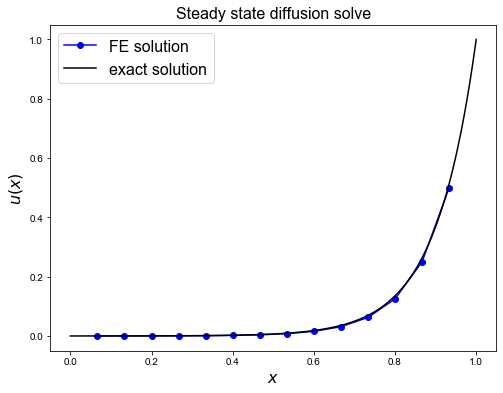

In [19]:
uL = 0.
uR = CE

def f(x):
    return 0.0

def advc_diff_fem(Ns):
    N_elements_CG = Ns
    N_nodes_CG = N_elements_CG + 1

    x_nodes = np.linspace(0, 1 , N_nodes_CG )
    dx = np.diff(x_nodes)
    # space to store our discretisaton matrices
    K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    RHS = np.zeros(N_nodes_CG - 2)

    K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
        - np.diag(1. / dx[1:-1]   , k=-1) \
        - np.diag(1. / dx[1:-1]   , k=1)

    # form RHS vector by integrating function f multiplied by basis function
    # loop over internal nodes
    for node in range(1, N_nodes_CG - 1):
        # and integrate our function multiplied by the corresponding cts basis function  
        phi_i = hat_function(node, x_nodes)
        integrand = lambda x : f(x) * phi_i(x)
        # simpsons with number intervals = 2 can integrate this exactly
        RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )


    # Add in the extra entries due to the inhomogeneous BCs

    # At the left the integral is only non-zero when phi_i and phi_0 both have
    # support - this only occurs over the first element when i=1 (remembering that i=0
    # isn't in our trial space. The integrand is then
    # uL multiplied by the derivative of \phi_1 in the first cell (1/dx[0])
    # multiplied by the derivative of \phi_0 in the first cell (-1/dx[0]).
    # This is a constant, and hence to do the integral we just need to 
    # multiply by the size of the cell (dx[0]):

    s = S(x_nodes)

    Ka = Pe * s[1:-1,1:-1] +  K

    RHS[0] = RHS[0] - (uL * (-1)/dx[0]) + Pe * uL * 0.5
    # and similarly for the RHS
    RHS[-1] = RHS[-1] - (uR * (-1)/dx[-1]) + Pe * uR *(-0.5)

    u = sl.solve(Ka,RHS)
    
    return u, x_nodes

u, x_nodes = advc_diff_fem(15)


fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion solve', fontsize=16)
ax1.plot(x_nodes[1:-1], u, 'bo-', label='FE solution')
x_fine = np.linspace(0, 1, 1000)
ax1.plot(x_fine, u_exact(x_fine), 'k-', label='exact solution')
ax1.legend(loc='best', fontsize=16);

print('error (RMS at nodes only) = ',
      sl.norm(u - u_exact(x_nodes[1:-1]) )
      /np.sqrt(len(u)) )

## Question
- Do you observe the expected order of convergence?

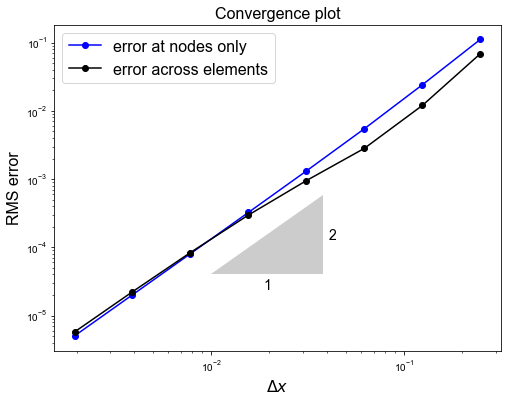

In [20]:
Ns = [2**p for p in range(2, 10)]
errors = np.zeros((2,len(Ns)))

for i, N in enumerate(Ns):
    
    u, x_nodes = advc_diff_fem(N)
    
    # RMS error of the nodal errors - cf. comments in main lecture text
    errors[0,i] = sl.norm(u - u_exact(x_nodes[1:-1])) / np.sqrt(len(u)) 
    # now let's do the RMS on a fine mesh to approximate the L2 norm
    x_fine = np.linspace(x_nodes[1],x_nodes[-2],1000)
    errors[1,i] = sl.norm(pwlinear(x_nodes[1:-1], u, x_fine) - u_exact(x_fine)) \
                        / np.sqrt(len(x_fine))

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.loglog(1./np.array(Ns), errors[0,:], 'bo-', label='error at nodes only')
ax1.loglog(1./np.array(Ns), errors[1,:], 'ko-', label='error across elements')
ax1.legend(loc='best', fontsize=16)

annotation.slope_marker((1e-2, 4e-5), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

## Analysis
we can find the slope 2 meet the expected order of convergence of FEM (which is 2th order).

error (RMS at nodes only) =  0.015130705618880061


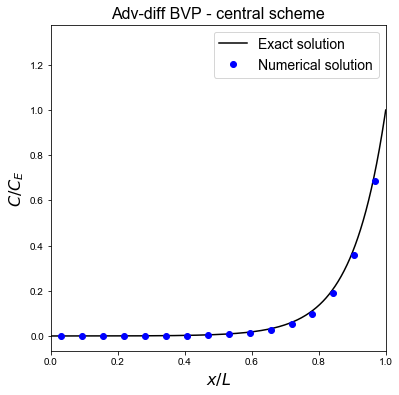

In [21]:
def BVP_AD_central(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff.
    
    Returns the mesh x and the solution C
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff
        A[i, i + 1] = r_diff - r_adv
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C


# call function to generate numerical solution
x, C = BVP_AD_central(L, U, kappa, CE, 16)

# construct the exact solution
xf = np.linspace(0, L, 1000)
Cex = CE * (np.exp(Pe * xf / L) - 1) / (np.exp(Pe) - 1)

# set up figure
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.plot(xf, Cex, '-k', label='Exact solution')
ax1.plot(x, C, 'ob', label='Numerical solution')
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Adv-diff BVP - central scheme', fontsize=16)
ax1.legend(loc='best', fontsize=14)

# to exclude ghost points just restrict the x limit of the plot
ax1.set_xlim(0, 1);
print('error (RMS at nodes only) = ', sl.norm(C[1:-1] - u_exact(x[1:-1]))/np.sqrt(x[1:-1].size))

## Question
- Finally, compare the errors in your solution against a corresponding finite difference solver. You may re-use code from lecture 7 for this. What do you observe?

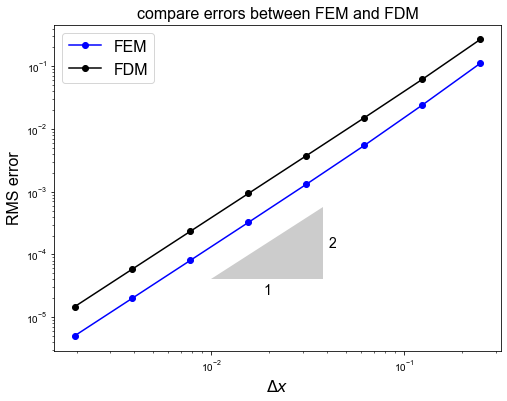

In [22]:
Ns = [2**p for p in range(2, 10)]
errors = np.zeros((2,len(Ns)))

for i, N in enumerate(Ns):
    
    u, x_nodes = advc_diff_fem(N)
    x, C = BVP_AD_central(L, U, kappa, CE, N)
    
    # RMS error of the nodal errors - cf. comments in main lecture text
    errors[0,i] = sl.norm(u - u_exact(x_nodes[1:-1])) / np.sqrt(len(u)) 
    # now let's do the RMS on a fine mesh to approximate the L2 norm
    errors[1,i] = sl.norm(C[1:-1] - u_exact(x[1:-1])) / np.sqrt(len(C[1:-1]))
    
    

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('compare errors between FEM and FDM', fontsize=16)
ax1.loglog(1./np.array(Ns), errors[0,:], 'bo-', label='FEM')
ax1.loglog(1./np.array(Ns), errors[1,:], 'ko-', label='FDM')
ax1.legend(loc='best', fontsize=16)

annotation.slope_marker((1e-2, 4e-5), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

## Analysis
we can find the order of convergence of two method is the same, but error of FEM is less than FDM

# Coursework Q4 - Time-dependent advection-diffusion with the FEM

In this part of the question we want to solve unsteady advection-diffusion.

This time base your solution on the 1D (local) assembly based finite element solver we implemented in lecture 12 and generalise it to include advection.

Test your implementation using the same advection-diffusion of a Gaussian problem considered in
lecture 8 homework question 2 "An analytical solution to advection-diffusion" where I explained and demonstrated how an appropriate Gaussian function can be considered as an exact solution to the advection-diffusion problem as long as we initialise our solution with the Gaussian evaluated at some $t>0$  (since in the limit of  $t=0$   the solution is a Dirac-delta function), and **use that same offset in time for the purpose of comparing the analytical solution with the numerical solution you obtain.**


```python
def adv_diff_analytical_solution(U, kappa, x0, x, t):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)
```


We can then use the same function evaluated at the appropriate time as an exact solution to compare our numerical method against.
For this question you can **consider the (non-periodic) domain $x\in[0,3]$** and you can **assume homogeneous Neumann boundary conditions.** Initialise the problem using the analytical solution centred **initially at $x=0.5$ with an initial time for the purposes of evaluating the Gaussian function of $t=0.05$**. **Assume a velocity of 1 and a diffusivity of 0.01.** Integrate the problem for a **total time period of 1** [NB. I've purposefully set these values and the size of the domain so you don't need to worry about your Gaussian getting close to a boundary].

**Perform some experiments with different $\Delta x$ and $\Delta t$ values such that you can demonstrate the expected order of convergence in space and in time** (for the time-stepping options of forward Euler, backward Euler and Crank-Nicolson). **To do this I suggest you fix one of $\Delta x$ or $\Delta t$ and vary the other independently**.

## Analysis

Consider time-dependent advection and diffusion written in the form:

$$\frac{\partial u}{\partial t} + U\frac{\partial u}{\partial x} = \kappa\frac{\partial^2 u}{\partial x^2}, $$

and assuming for simplicity that the diffusivity $\kappa$ and velocity $U$ are constant.

The weak/variational form of this problem can be written as (ignoring boundary terms)

which is implemented after separate part integration

$$ \int_I \,\frac{\partial u}{\partial t}\,v\,dx + \kappa\int_I \,u'\,v'\,dx - U\int_I \,u\,v'\,dx = 0, \;\;\;\;\forall \;\; v\in V.$$

in matrix form

$$
M\, \frac{d \boldsymbol{u}}{d t} + (\kappa\, K - U S)\boldsymbol{u} = \boldsymbol{0},
$$

where $K$ is the discretisation matrix for diffusion we saw previously, $S$ is the discretisation for advection, and $M$ is the mass matrix

Considering the same idea for solving question 3, the function $(\kappa\, K - U S)\boldsymbol{u}$ is also a linear combination.So I can substitude this into time-dependent diffusion function.

Suppose we want to implement the "theta" method (to give us the flexibility to choose forward Euler, backward Euler or Crank-Nicolson), then we have to consider the system

$$
M \,\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} + (\kappa\, K - U S)\,\left(\theta \left(\boldsymbol{u}^{n+1} + (1-\theta)\boldsymbol{u}^{n}\right)\right) = \boldsymbol{0},
$$

which can be rearranged to 

$$ \left( M + \theta\,\Delta t \,(\kappa\, K - U S) \right)  \boldsymbol{u}^{n+1} = \left( M - (1-\theta)\, \Delta t \,(\kappa\, K - U S) \right) \boldsymbol{u}^{n}.$$



In [23]:
def generate_1D_CG_mesh(Lx, N_elements_CG, mesh_option=0):
    """ Function to generate a mesh given the domain size Lx
    (we assume the left hand entry is always at zero).
    
    Use N_elements_CG number of element.
    
    mesh_option==0 corresponds to a uniform mesh - only option implemented so far.
    
    Returns: the node locations x_node and the mesh spacing dx
    """
    if(mesh_option==0):
        x_nodes = np.linspace(0, Lx ,N_elements_CG+1)
    else:
        raise Exception('mesh_option != 0 not implemented yet')
    # given the mesh compute an array of element sizes
    dx = np.diff(x_nodes)
    return x_nodes, dx

def connectivity(N_loc, N_elements_CG):
    """ Generate the connectivity matrix of dimension N_loc * N_elements_CG.
    
    Row corresponds to the local node number, column to the element number,
    the entry of the matrix is then a global node number.
    
    Returns: the connectivity matrix
    """
    connectivity_matrix = np.zeros((N_loc, N_elements_CG), dtype=int)
    if(N_loc==2):
        for element in range (N_elements_CG):
            connectivity_matrix[0, element] = element
            connectivity_matrix[1, element] = element + 1
    else:
        raise Exception('Only linear element (N_loc=2) implemented.')
    return connectivity_matrix

def shape(N_loc, N_gi):
    """ Define reference shape functions - their values at N_gi quadrature points.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - linear basis functions.
    """ 
    assert(N_loc==2)
    phi = np.zeros( (N_loc, N_gi) )
    if(N_gi==2):
        phi[0,0] = 1.0 
        phi[0,1] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 1.0
    elif(N_gi==3):
        phi[0,0] = 1.0 
        phi[0,1] = 0.5 
        phi[0,2] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 0.5 
        phi[1,2] = 1.0        
    else:
        raise Exception('N_gi value not implemented.')
    return phi

def shape_derivatives(element, dx, N_loc, N_gi):
    """ Define derivatives of shape functions - their values at N_gi quadrature points
    over the reference element.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - 
    linear basis functions.
    """   
    assert(N_loc==2)
    phi_x = np.zeros( (N_loc, N_gi) )
    # the derivatives of our linear basis functions over the reference element
    if(N_gi==2):
        
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] =  phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0]  
        phi_x[1,1] =  phi_x[1,0]
    elif(N_gi==3):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] = phi_x[0,0] 
        phi_x[0,2] = phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0] 
        phi_x[1,1] = phi_x[1,0] 
        phi_x[1,2] = phi_x[1,0]            
    else:
        raise Exception('N_gi value not implemented.')
    # Jacobian contribution as seen/explained above due to the use of the chain rule
    phi_x = phi_x * (2. / dx[element]) 
    return phi_x

def quadrature(N_gi):
    """ Define quadrature rule on N_gi quadrature points.
    """    
    weight = np.zeros(N_gi)
    if(N_gi==2):  # Trapezoidal rule in 1D
        weight[0] = 0.5 
        weight[1] = 0.5
    elif(N_gi==3): # Simpson's rule in 1D
        weight[0] = 1. / 6. 
        weight[1] = 2. / 3. 
        weight[2] = 1. / 6.
    else:
        raise Exception('N_gi value not implemented.')
    return weight

def assembly_local(M, K, S, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx):
    """ Perform local assembly by looping over products of the local node numbers 
    (i.e. products of local basis functions), computing the required integrals, and 
    adding contributions to the correct locations of the global discretisation matrices.
    As we are solving the Diffusion problem we know we need the mass matrix M, and the 
    diffusion discretisation matrix K.  The current version of M and K are passed in here
    and the local contribitions added in to them.
    """
    for i_loc in range(N_loc):
        i_global = connectivity_matrix[i_loc, element]
        for j_loc in range(N_loc):
            j_global = connectivity_matrix[j_loc, element]
            # perform the quadrature - over one element with one "quadrature interval"
            # "weight" is the quadrature weight, e.g. 1/6, 4/6, 1/6 for Simpson's rule
            # and we need to remember to include the Jacobian determinant
            phi_phi = 0.
            phix_phix = 0.
            phix_phi = 0.
            for gi in range(N_gi):
                phi_phi += weight[gi] * phi[i_loc, gi] * phi[j_loc, gi] * 0.5*dx[element] 
                # dx/2 in the line above is the Jacobian determinant 
                phix_phix += weight[gi] * phi_x[i_loc, gi] * phi_x[j_loc, gi] * 0.5*dx[element]
                phix_phi += weight[gi] * phi_x[i_loc, gi] * phi[j_loc, gi] * 0.5*dx[element]
            M[i_global, j_global] = M[i_global, j_global] + phi_phi
            K[i_global, j_global] = K[i_global, j_global] + phix_phix
            S[i_global, j_global] = S[i_global, j_global] + phix_phi
            
def assembly_global(M, K, S, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx):
    """ Perform global assembly by looping over elements.
    """
    # loop over all elements
    for element in range(N_elements_CG):
        # compute the derivatives of the basis function on this element
        phi_x = shape_derivatives(element, dx, N_loc, N_gi)
        # perform local assembly and update the M and K matrices
        assembly_local(M, K, S, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx)
        
def apply_bcs(A, b, lbc, rbc, bc_option=0):
    """Apply BCs using a big spring method.
    
    bc_option==0 Homogeneous Neumann
    bc_option==1 inhomogeneous Dirichlet
    """
    if(bc_option==0):
        return
    elif(bc_option==1):
        big_spring = 1.0e10
        A[0,0] = big_spring            
        b[0]   = big_spring * lbc
        A[-1,-1] = big_spring            
        b[-1]   = big_spring * rbc
    else:
        raise Exception('bc option not implemented')       
        
def initial_condition(x, t=0.05, U=1, kappa=0.01, x0=0.5, IC_option=0):
    """ Function to define an initial condition on our mesh.
    """
    if(IC_option==0):
        return adv_diff_analytical_solution(x, t, U, kappa, x0)
    else:
        raise Exception('Option not implemented.')       
        
def adv_diff_analytical_solution(x, t=1.05, U=1, kappa=0.01, x0=0.5):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)

In [24]:
def FEM_adv_diff(N_nodes_CG,x0=0.5,bc_condition=0, Lx=3, t_start=0.05,t_end=1.05,
                 dt = 0.001, N_loc = 2, N_gi = 3, theta = 0.0):

    N_elements_CG = N_nodes_CG - 1

    # generate mesh
    x_nodes, dx = generate_1D_CG_mesh(Lx, N_elements_CG)
    connectivity_matrix = connectivity(N_loc, N_elements_CG)

    t = t_start

    u_ic = initial_condition(x_nodes, t, U, kappa, x0)

    # we recall from an earlier lecture that for explicit time-stepping we should keep an 
    # eye on the size of the "r parameter"
    
    # and compute and print some key non-dimensional parameters
    print('N_nodes_CG {0:d}'.format(N_nodes_CG))
    print('dx:   {0:.5f}'.format(np.min(dx)))
    print('dt:   {0:.5f}'.format(dt))
    print('CFL:  {0:.5f}'.format(U*dt/np.min(dx)))
    print('Pe_c: {0:.5f}'.format(U*np.max(dx)/kappa))
    print('r:    {0:.5f}\n'.format(kappa*dt/(np.min(dx)**2)))

    # set-up things we need for our discretisation
    # the basis functions defined on our reference element
    phi = shape(N_loc, N_gi)

    # quadrature weights
    weight = quadrature(N_gi)

    # allocate space to store our discretisation matrices
    M = np.zeros((N_nodes_CG, N_nodes_CG))
    K = np.zeros((N_nodes_CG, N_nodes_CG))
    S = np.zeros((N_nodes_CG, N_nodes_CG))

    # assemble the individual discretisation matrices
    assembly_global(M, K, S, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx)

    # and combine them into our final matrix system
    A = M + dt*theta*(kappa*K-U*S)
    RHS_matrix = M - dt*(1-theta)*(kappa*K-U*S)

    # and finally time step
    u_old = np.copy(u_ic)
    while t<t_end:
        b = RHS_matrix @ u_old.T
        apply_bcs(A, b, 0, 0, bc_option=bc_condition)
        u = sl.solve(A, b)
        u_old = np.copy(u)
        t += dt
        
    return u, u_ic, x_nodes

N_nodes_CG 201
dx:   0.05000
dt:   0.01000
CFL:  0.20000
Pe_c: 5.00000
r:    0.04000

N_nodes_CG 201
dx:   0.05000
dt:   0.01000
CFL:  0.20000
Pe_c: 5.00000
r:    0.04000

N_nodes_CG 201
dx:   0.05000
dt:   0.01000
CFL:  0.20000
Pe_c: 5.00000
r:    0.04000

N_nodes_CG 201
dx:   0.05000
dt:   0.01000
CFL:  0.20000
Pe_c: 5.00000
r:    0.04000



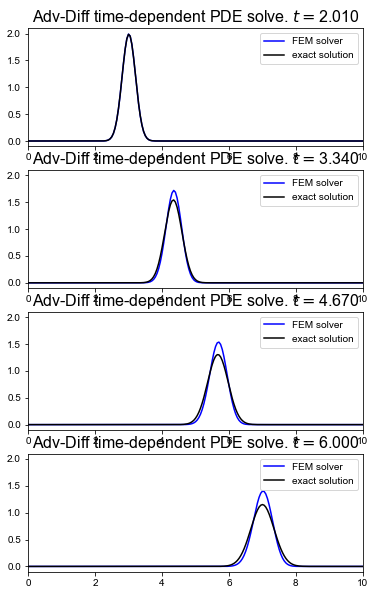

In [25]:
# first qustion
U = 1.
kappa = 1./100.
N = 500
L = 10.
dx = L / N
dt = 0.01
t_start = 2.
x0 = 1.0
t_end = np.linspace(2.01, 6, 4)

fig, ax = plt.subplots(len(t_end),1, figsize=(6,10))
for i in range(len(t_end)):
    u, _, x_nodes = FEM_adv_diff(N_nodes_CG=201, x0=x0, bc_condition=0, Lx=10, t_start=t_start, t_end=t_end[i], dt=dt)
    u_exact = adv_diff_analytical_solution(x_nodes, t_end[i], U, kappa, x0)
    ax[i].plot(x_nodes, u,'b-', label='FEM solver')
    ax[i].plot(x_nodes, u_exact,'k-', label='exact solution')
    ax[i].legend(loc='best')
    ax[i].set_xlim(0.0, 10.0)
    ax[i].set_ylim(-0.1, 2.1)
    ax[i].set_title('Adv-Diff time-dependent PDE solve. $t=${0:.3f}'.format(t_end[i]), fontsize=16)

## Analysis
we can find that the FEM solver get the approximate result with exact solution, but as time going, the error of FEM solver is increasing.

In [26]:
# second question

# domain size
Lx = 3.
kappa = 0.01
U = 1.
Pe = L * U / kappa

u, u_ic, x_nodes = FEM_adv_diff(N_nodes_CG=51)
u_exact = adv_diff_analytical_solution(x_nodes)

N_nodes_CG 51
dx:   0.06000
dt:   0.00100
CFL:  0.01667
Pe_c: 6.00000
r:    0.00278



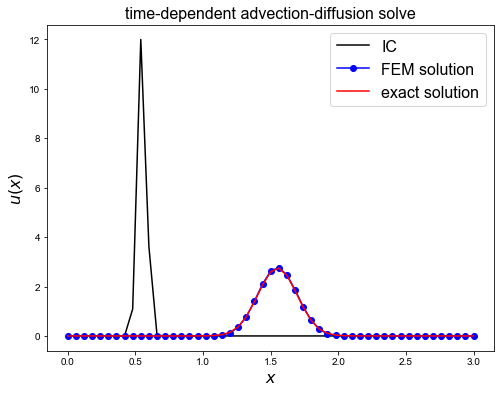

In [27]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('time-dependent advection-diffusion solve', fontsize=16)

ax1.plot(x_nodes, u_ic, 'k-', label='IC')
ax1.plot(x_nodes, u, 'bo-', label='FEM solution')
ax1.plot(x_nodes, u_exact, 'r', label='exact solution')
ax1.legend(loc='best', fontsize=16);

## Analysis
we can find that the FEM solution is the same as exact solution from picture.

From above two two pictures, we can assert that the FEM model is correctly constructed.

In [28]:
# Function for experiments

def plot_convergence(D, loop_for_x=True, theta=0):

    assert theta in [0, 0.5, 1]
    
    if loop_for_x:
        N = D
        dx = Lx / (N - 1)
    else:
        t = D

    fig, ax = plt.subplots(1,2,figsize=(25,10))
    error = []
    
    method = ['Foeward Euler', 'Backward Euler', 'Crank-Nicolson']
    if theta == 0:
        name = method[0]
    elif theta == 1:
        name = method[1]
    else:
        name = method[2]

    if loop_for_x:
        
        for i in range(len(N)):
            u, u_ic, x_nodes = FEM_adv_diff(N[i], theta=theta)
            u_exact = adv_diff_analytical_solution(x_nodes)
            error.append(np.linalg.norm(u - u_exact)/np.sqrt(len(x_nodes)))

            ax[0].plot(x_nodes ,u, label='dx = ' + str(dx[i]))
            ax[0].set_title(name + ' experiment with different dx', fontsize=16)
            ax[1].set_title('order of convergence of ' + name + ' experiment with different dx error', fontsize=16)
            
        para = np.polyfit(np.log(dx), np.log(error), 1)
        x_tem = np.linspace(np.min(dx), np.max(dx), 100)
        y_tem = x_tem ** para[0] * np.exp(para[1])
        
        ax[1].loglog(dx, error, 'bo')
        ax[1].set_xlabel('dx', fontsize=16)
        
    else:
        for i in range(len(t)):
            u, u_ic, x_nodes = FEM_adv_diff(201, dt=t[i], theta=theta)
            u_exact = adv_diff_analytical_solution(x_nodes)
            error.append(np.linalg.norm(u - u_exact)/np.sqrt(len(x_nodes)))

            ax[0].plot(x_nodes , u, label='dt = ' + str(t[i]))
            ax[0].set_title(name + ' experiment with different dt', fontsize=16)
            ax[1].set_title('order of convergence of ' + name + ' experiment with different dt error', fontsize=16)
            
        para = np.polyfit(np.log(t), np.log(error), 1)
        x_tem = np.linspace(np.min(t), np.max(t), 100)
        y_tem = x_tem ** para[0] * np.exp(para[1])
        
        ax[1].loglog(t, error, 'bo')
        ax[1].set_xlabel('d t', fontsize=16)
    
    u_exact = adv_diff_analytical_solution(x_nodes)
    ax[0].plot(x_nodes, u_exact, 'k',label='exact solution')
    ax[0].legend(fontsize=16)
    ax[0].set_title('exact solution and FEM solution for different parameters', fontsize=16)
    ax[0].set_xlabel('x', fontsize=16)
    ax[0].set_ylabel('u(x)', fontsize=16)
    ax[1].loglog(x_tem, y_tem, label='slope: ' + str(para[0]))
    ax[1].legend(fontsize=16)
    ax[1].set_ylabel('Error', fontsize=16)

# Forward Euler experiment

N_nodes_CG 16
dx:   0.20000
dt:   0.00100
CFL:  0.00500
Pe_c: 20.00000
r:    0.00025

N_nodes_CG 32
dx:   0.09677
dt:   0.00100
CFL:  0.01033
Pe_c: 9.67742
r:    0.00107

N_nodes_CG 64
dx:   0.04762
dt:   0.00100
CFL:  0.02100
Pe_c: 4.76190
r:    0.00441

N_nodes_CG 128
dx:   0.02362
dt:   0.00100
CFL:  0.04233
Pe_c: 2.36220
r:    0.01792

N_nodes_CG 256
dx:   0.01176
dt:   0.00100
CFL:  0.08500
Pe_c: 1.17647
r:    0.07225



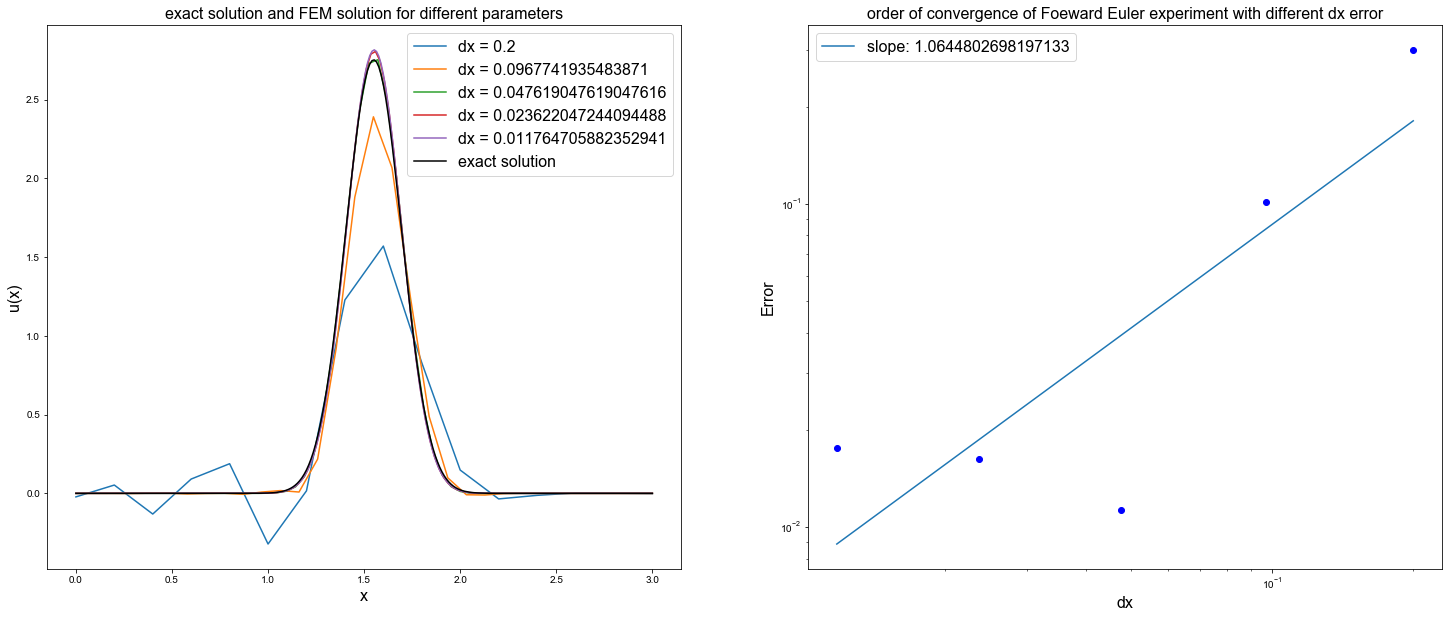

In [29]:
Node = 2**np.arange(4,9, dtype=int)
plot_convergence(Node, loop_for_x=True, theta=0)

N_nodes_CG 201
dx:   0.01500
dt:   0.00300
CFL:  0.20000
Pe_c: 1.50000
r:    0.13333

N_nodes_CG 201
dx:   0.01500
dt:   0.00250
CFL:  0.16667
Pe_c: 1.50000
r:    0.11111

N_nodes_CG 201
dx:   0.01500
dt:   0.00200
CFL:  0.13333
Pe_c: 1.50000
r:    0.08889

N_nodes_CG 201
dx:   0.01500
dt:   0.00150
CFL:  0.10000
Pe_c: 1.50000
r:    0.06667

N_nodes_CG 201
dx:   0.01500
dt:   0.00100
CFL:  0.06667
Pe_c: 1.50000
r:    0.04444



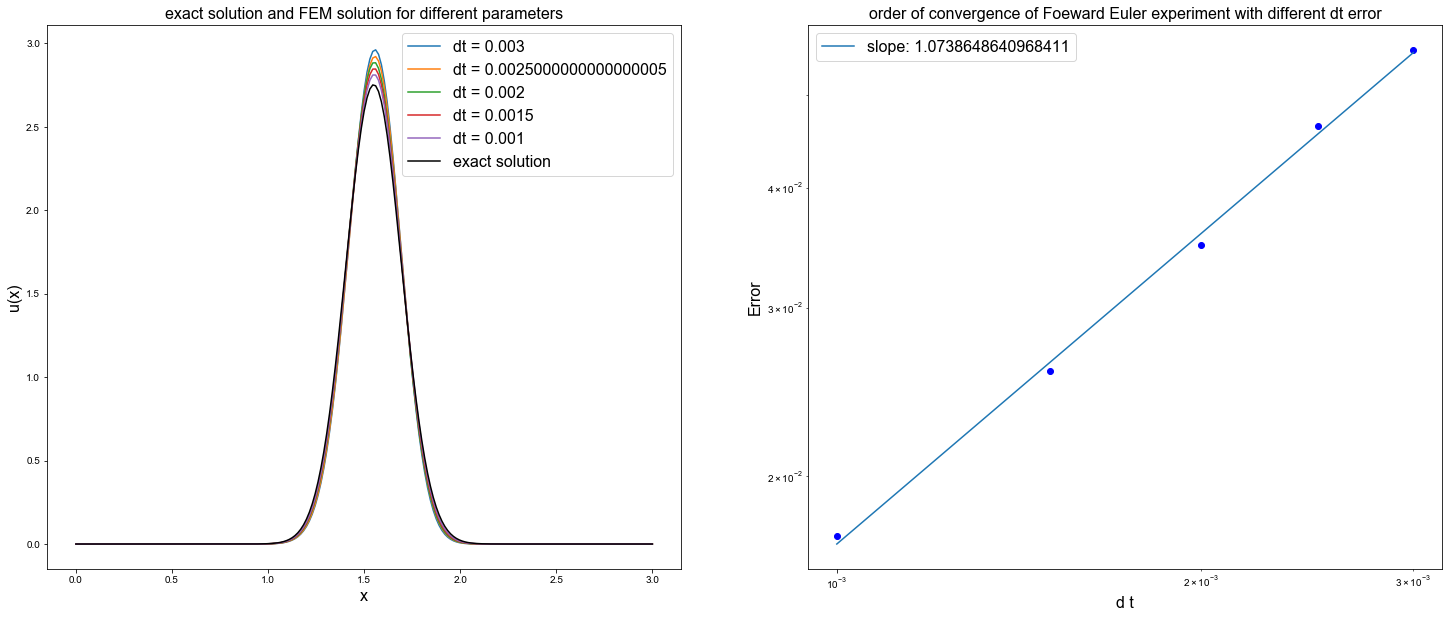

In [30]:
dt = np.array([0.03,0.025,0.02,0.015,0.01])*0.1
plot_convergence(dt, loop_for_x=False, theta=0)

# Analysis
we know that the expected order of convergence for Forward Euler in space-steping an in time-steping is 1.

From our experiments, we can find the order of convergen in space-steping is about 1.06 and about 1.07 in time-steping, which can demonstrate that it approximately meet the theorem.

# Backward Euler experiment

N_nodes_CG 16
dx:   0.20000
dt:   0.00100
CFL:  0.00500
Pe_c: 20.00000
r:    0.00025

N_nodes_CG 32
dx:   0.09677
dt:   0.00100
CFL:  0.01033
Pe_c: 9.67742
r:    0.00107

N_nodes_CG 64
dx:   0.04762
dt:   0.00100
CFL:  0.02100
Pe_c: 4.76190
r:    0.00441

N_nodes_CG 128
dx:   0.02362
dt:   0.00100
CFL:  0.04233
Pe_c: 2.36220
r:    0.01792

N_nodes_CG 256
dx:   0.01176
dt:   0.00100
CFL:  0.08500
Pe_c: 1.17647
r:    0.07225



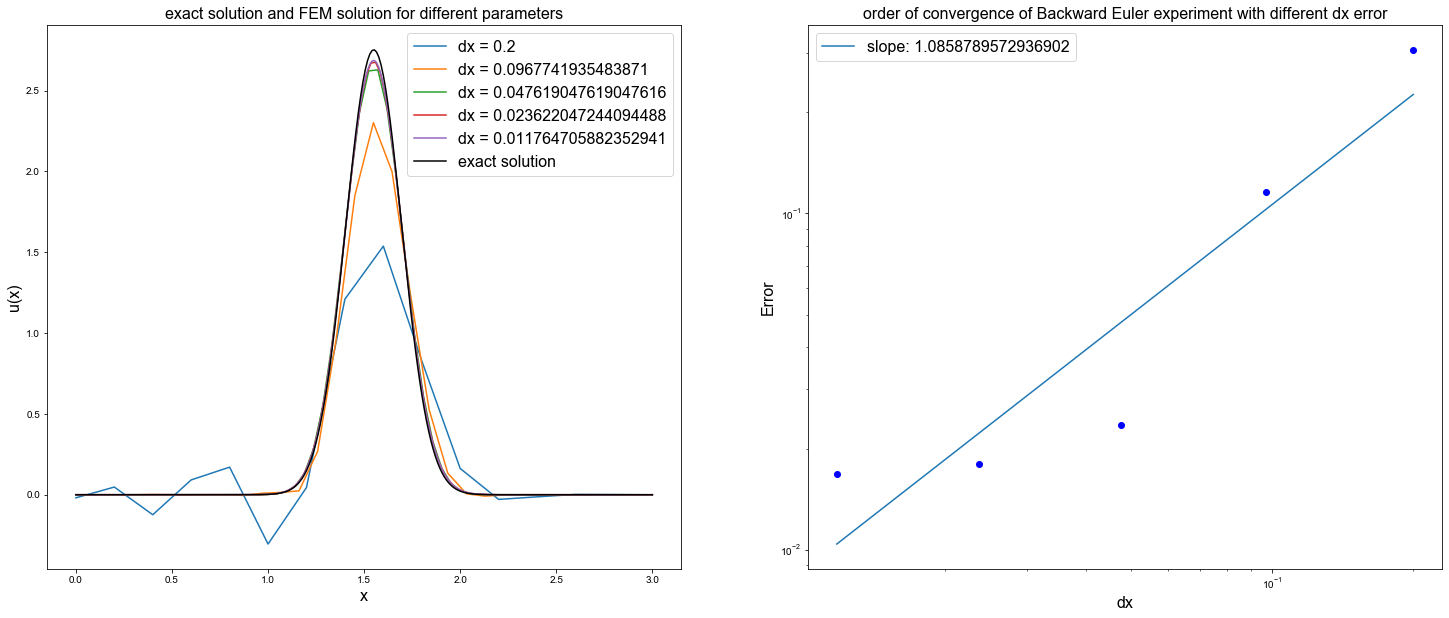

In [31]:
Node = 2**np.arange(4,9, dtype=int)
plot_convergence(Node, loop_for_x=True, theta=1)

N_nodes_CG 201
dx:   0.01500
dt:   0.00300
CFL:  0.20000
Pe_c: 1.50000
r:    0.13333

N_nodes_CG 201
dx:   0.01500
dt:   0.00250
CFL:  0.16667
Pe_c: 1.50000
r:    0.11111

N_nodes_CG 201
dx:   0.01500
dt:   0.00200
CFL:  0.13333
Pe_c: 1.50000
r:    0.08889

N_nodes_CG 201
dx:   0.01500
dt:   0.00150
CFL:  0.10000
Pe_c: 1.50000
r:    0.06667

N_nodes_CG 201
dx:   0.01500
dt:   0.00100
CFL:  0.06667
Pe_c: 1.50000
r:    0.04444



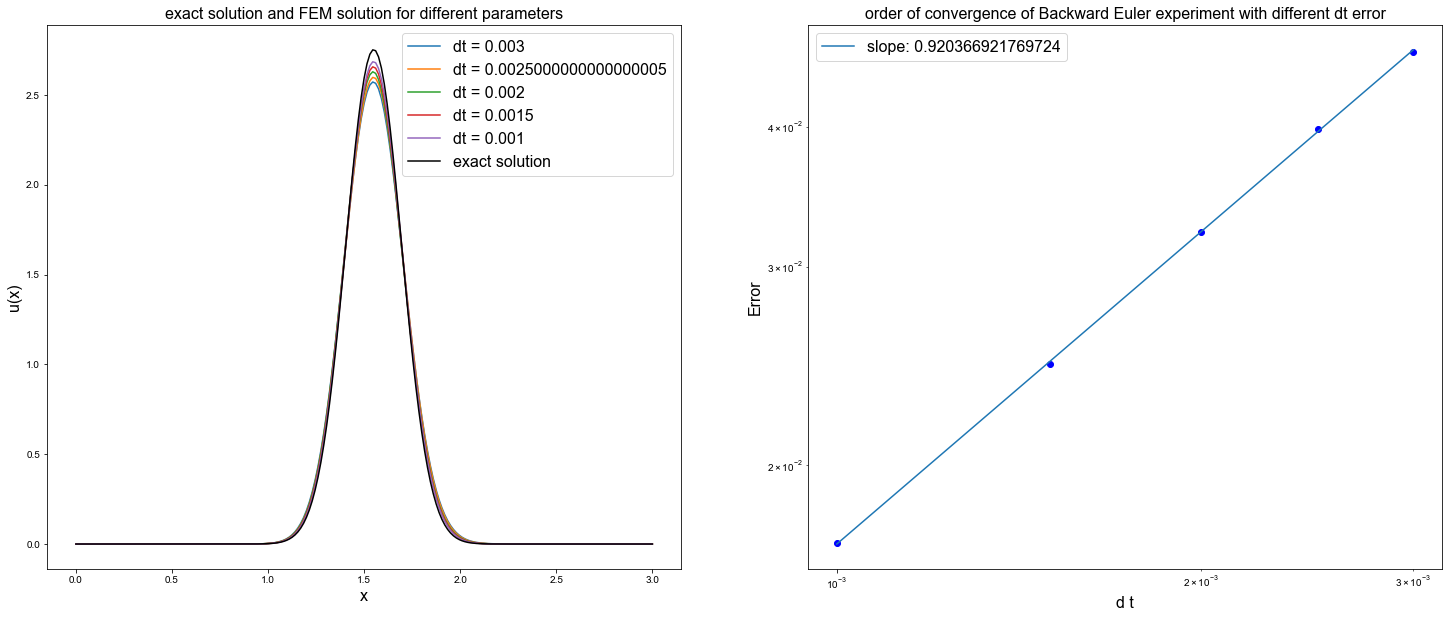

In [32]:
dt = np.array([0.03,0.025,0.02,0.015,0.01])*0.1
plot_convergence(dt, loop_for_x=False, theta=1)

# Analysis
we know that the expected order of convergence for Backward Euler in space-steping an in time-steping is 1.

From our experiments, we can find the order of convergen in space-steping is about 1.09 and about 0.92 in time-steping, which can demonstrate that it approximately meet the theorem.

# Crank-Nicolson

N_nodes_CG 16
dx:   0.20000
dt:   0.00100
CFL:  0.00500
Pe_c: 20.00000
r:    0.00025

N_nodes_CG 32
dx:   0.09677
dt:   0.00100
CFL:  0.01033
Pe_c: 9.67742
r:    0.00107

N_nodes_CG 64
dx:   0.04762
dt:   0.00100
CFL:  0.02100
Pe_c: 4.76190
r:    0.00441

N_nodes_CG 128
dx:   0.02362
dt:   0.00100
CFL:  0.04233
Pe_c: 2.36220
r:    0.01792



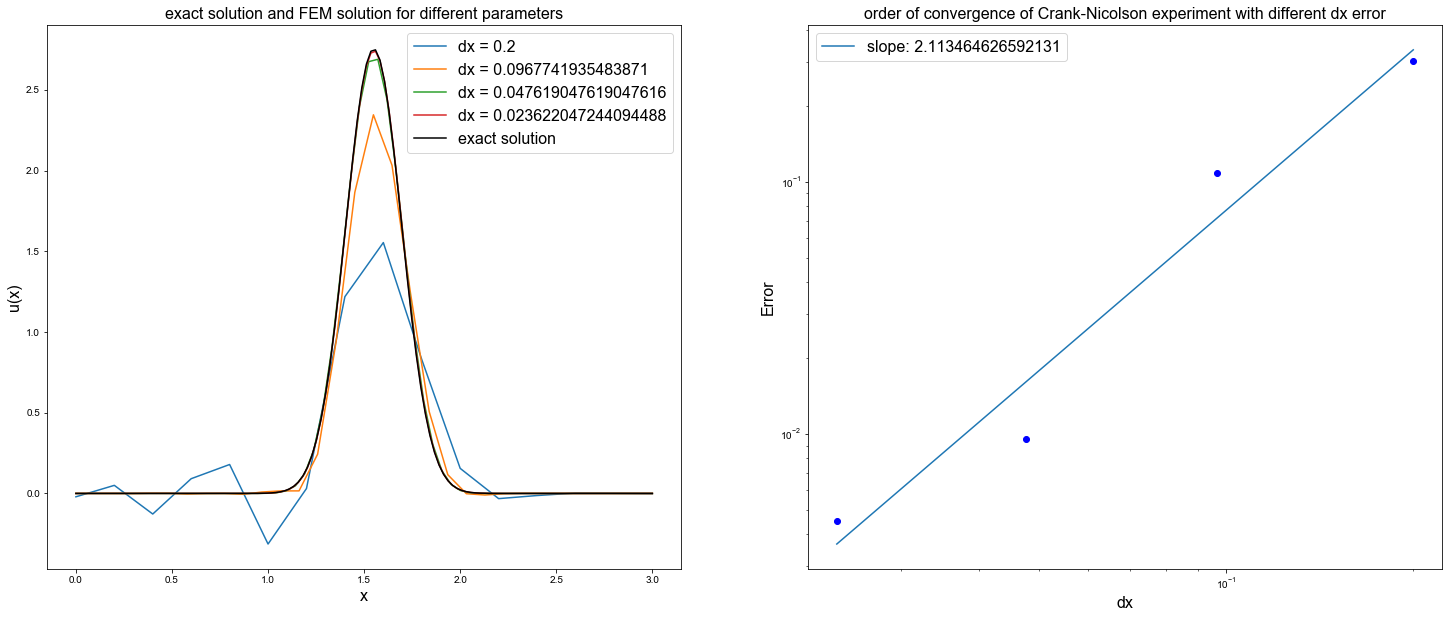

In [33]:
Node = 2**np.arange(4,8, dtype=int)
plot_convergence(Node, loop_for_x=True, theta=0.5)

N_nodes_CG 201
dx:   0.01500
dt:   0.05000
CFL:  3.33333
Pe_c: 1.50000
r:    2.22222

N_nodes_CG 201
dx:   0.01500
dt:   0.04000
CFL:  2.66667
Pe_c: 1.50000
r:    1.77778

N_nodes_CG 201
dx:   0.01500
dt:   0.03000
CFL:  2.00000
Pe_c: 1.50000
r:    1.33333

N_nodes_CG 201
dx:   0.01500
dt:   0.02000
CFL:  1.33333
Pe_c: 1.50000
r:    0.88889

N_nodes_CG 201
dx:   0.01500
dt:   0.01000
CFL:  0.66667
Pe_c: 1.50000
r:    0.44444



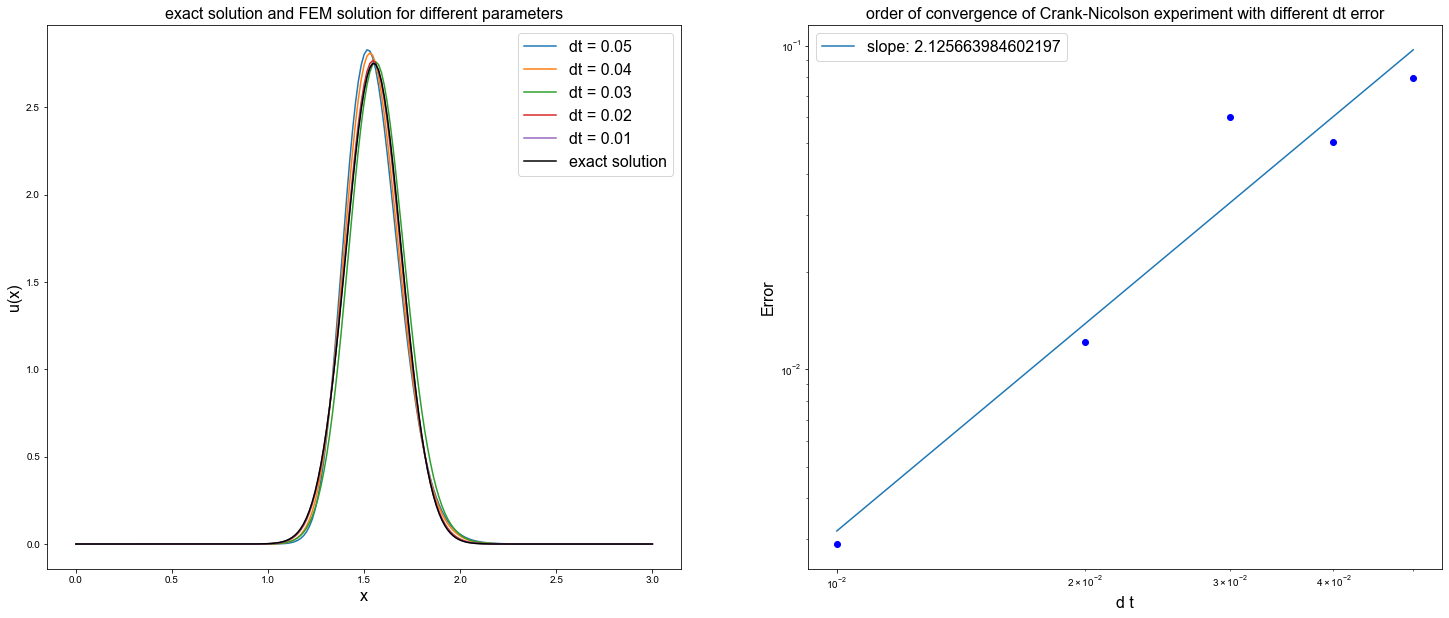

In [34]:
dt = [0.05,0.04,0.03,0.02,0.01]
plot_convergence(dt, loop_for_x=False, theta=0.5)

# Analysis
we know that the expected order of convergence for Crank-Nicolson in space-steping an in time-steping is 2.

From our experiments, we can find the order of convergen in space-steping is about 2.11 and about 2.13 in time-steping, which can demonstrate that it approximately meet the theorem.